# Точные доверительные интервалы для нормальных выборок

Тестирование гипотезы о нормальности выборок с помощью теста Колмогорова-Смирнова, построение точных доверительнх интервалов для среднего, дисперсии, разности средних, отношения дисперсий, для долей. Построение корреляционной матрицы.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась на факультете "Э".  Подгрузим файл и посмотрим на него.

In [2]:
df = pd.read_csv('cr.csv', sep='\t')
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__Распределение результатов контрольной__ 

- Запишем все оценки за первую контрольную в переменную `x`, все пропуски удалим
- Найдем среднее и стандартное отклонение (используя несмещённую оценку) 
- Построим гистограмму результатов за первую контрольную 
- На этой же картинке построим плотность нормального распределения со средним и стандартным отклонением, посчитанными выше 

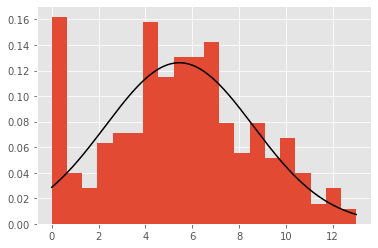

In [6]:
x = df.k1.dropna()
x_mean = x.mean()
x_std = x.std(ddof=1)

plt.hist(x, bins=20, density=True)

xs = np.linspace(0, 13, 300)
ys = stats.norm(loc=x_mean, scale=x_std).pdf(xs)
plt.plot(xs, ys, color="black");

__Проверка на нормальность__
> Проверим с помощью теста Колмогорова-Смирнова гипотезу о нормальности

In [18]:
res = stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))
pvalue = res.pvalue
pvalue

0.2504927745102798

p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, мы можем дальше использовать эту предпосылку

Предположим независимость и одинаковую распределённость наблюдений (никто не списывал контрольную друг у друга).

__Интервал для среднего__ 

Точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используем несмещённый вариант. В переменные `left` и `right` записаны границы получившегося интервала. В переменную `delta` его ширина. 

In [23]:
alpha = 0.05
t = stats.t(df=x.size - 1).ppf(1 - alpha/2)

left = x.mean() - t * x.std(ddof=1)/np.sqrt(x.size)
right = x.mean() + t * x.std(ddof=1)/np.sqrt(x.size)
delta = right - left

print(f"Доверительный интервал [{left:.4}, {right:.4}] ширины {delta:.4}")

Доверительный интервал [5.132, 5.763] ширины 0.6307


__Анализ студентов, которые списывали и писали сами__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишем оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалим. Построим на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

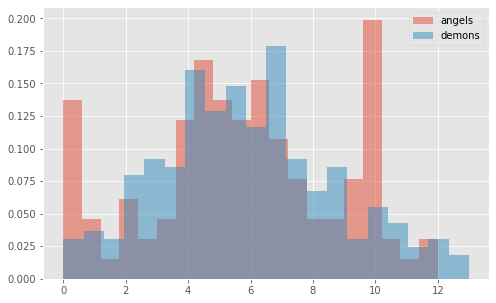

In [27]:
angels = df[df.fraud == 0].k1.dropna()
demons = df[df.fraud > 0].k1.dropna()
angels.size, demons.size

plt.figure(figsize = (8,5))

df[df.fraud == 0].k1.hist(alpha=0.5, bins=20, density=True, label='angels')
df[df.fraud > 0].k1.hist(alpha=0.5, bins=20, density=True, label='demons')
plt.legend();

__Интервал для разницы средних__ 

Примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используем несмещённый вариант.

In [32]:
diff = angels.mean() - demons.mean()
nx, ny = angels.size, demons.size
diff_sd = np.sqrt(angels.var(ddof=1)/nx + demons.var(ddof=1)/ny)

u = (angels.var(ddof=1) / nx + demons.var(ddof=1) / ny) ** 2 # число степеней свободы в распределении Стьюдента
d = (angels.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (demons.var(ddof=1)**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
delta = right - left 
print(f"Доверительный интервал [{left:.4}, {right:.4}] ширины {delta:.4}")

Число степеней свободы: 191.6860656421597
Доверительный интервал [-0.8046, 0.547] ширины 1.352


В получившийся доверительный интервал входит ноль. Это значит, что, вероятно, нет различий между средними результатами тех, кто списывал, и тех, кто писал сам.

__Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Построим для отношения нервозности Ангелов и Демонов $95\%$ доверительный интервал. Для оценки всех дисперсий используем несмещённый вариант. 

In [36]:
alpha = 0.05

n, m = angels.size - 1, demons.size - 1
sn, sm = angels.var(ddof=1), demons.var(ddof=1)

left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)
delta = right - left 
print(f"Доверительный интервал [{left:.4}, {right:.4}] ширины {delta:.4}")

Доверительный интервал [0.612, 1.162] ширины 0.5503


В доверительный интервал вошла единица. Это может означать, что дисперсии результатов не отличаются, а значит и те, кто списывал, и те, кто не списывал, волнуются одинаково

__Матрицы корреляций для тех, кто списывает, и тех, кто пишет сам__ 

Нарисуем корреляционную матрицу по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполним нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание.

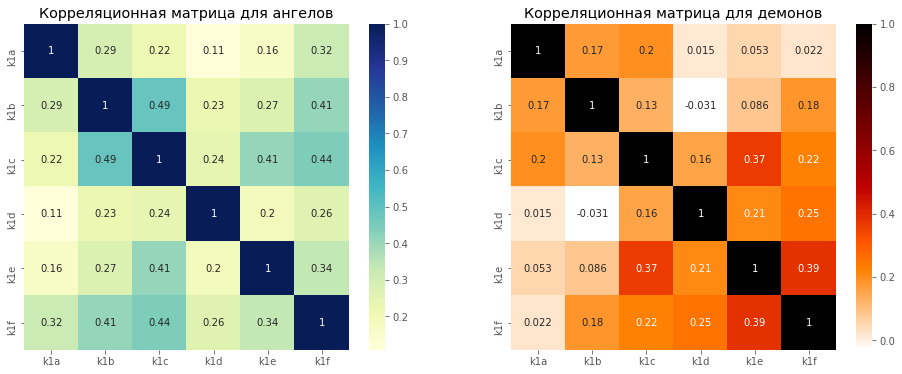

In [39]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

_, axes = plt.subplots(1, 2, figsize=(16,6))

corr_angel = df[df.fraud == 0][tasks].fillna(0).corr()
corr_deamon = df[df.fraud > 0][tasks].fillna(0).corr()

sns.heatmap(corr_angel, ax=axes[0], cmap="YlGnBu", annot=True)
sns.heatmap(corr_deamon, ax=axes[1], cmap="gist_heat_r", annot=True)
axes[0].set_title("Корреляционная матрица для ангелов")
axes[1].set_title("Корреляционная матрица для демонов");

Найдем задачи, между баллом за которые самая высокая корреляция у Ангелов

In [42]:
names_angels = list(angels_corr.replace(1, None).max().sort_values(ascending=False).index[:2])
names_demons = list(demons_corr.replace(1, None).max().sort_values(ascending=False).index[:2])

__Интервал для доли написавших третью контрольную__

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Построим асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

In [45]:
alpha = 0.05

x = df[df.fraud == 0].k3
y = df[df.fraud > 0].k3

px, py = np.mean(x == 0), np.mean(y == 0)
nx, ny = x.size, y.size

z = stats.norm().ppf(1 - alpha/2)

left = (px - py) - z * np.sqrt(px*(1-px)/nx + py*(1-py)/ny)
right = (px - py) + z * np.sqrt(px*(1-px)/nx + py*(1-py)/ny)
delta = right - left 
print(f"Доверительный интервал [{left:.4}, {right:.4}] ширины {delta:.4}")

Доверительный интервал [-0.03341, 0.1885] ширины 0.2219


В доверительный интервал входит ноль. Это значит, что доли тех, кто пошел писать третью контрольную, могут совпадать среди списывающих и не списывающих

__Разница средних__ 

Посмотрим на результаты студентов в динамике. Построим точный $95\%$ доверительный интервал для средней разницы оценок за первую и вторую контрольные. Пропуски в данных заполним нулями. 

In [48]:
alpha = 0.05

t = stats.t(df=x.size - 1).ppf(1 - alpha/2)
d = df.k2.fillna(0) - df.k1.fillna(0)

left = d.mean() - t * d.std(ddof=1)/np.sqrt(d.size)
right = d.mean() + t * d.std(ddof=1)/np.sqrt(d.size)
delta = right - left 
print(f"Доверительный интервал [{left:.4}, {right:.4}] ширины {delta:.4}")

Доверительный интервал [-1.459, -0.7041] ширины 0.7552


В доверительный интервал не входит ноль. Значит, результаты второй контрольной отличаются от первой, причем на отрицательную величину, что значит, что вторую контрольную написали хуже в среднем, чем первую

__Таким образом, можно сделать вывод, что в списывании в конечном итоге нет особого смысла и профита для студента__